<a href="https://colab.research.google.com/github/pHoangKhuong/20130297_PhamHoangKhuong/blob/main/Nhom44_20130297_PhamHoangKhuong_DAGK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mount Drive:**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Colab Notebooks'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks


# **Import libraries:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings(action='ignore')


# **Load dataset:**

In [ ]:
df = pd.read_csv("forestfires.csv")
df


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [ ]:
# Cung cấp thông tin chi tiết về tập dữ liệu trong từng cột như giá trị trung bình, độ lệch chuẩn, tối đa, tối thiểu
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
# Liệt kê thông tin dữ liệu có trong khung dữ liệu 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [ ]:
# Trả về các giá trị duy nhất có tên tháng từ các cột dữ liệu
df['month'].unique()


array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [ ]:
# Trả về các giá trị duy nhất có tên ngày từ các cột dữ liệu
df['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [ ]:
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [ ]:
# Hàm này để thực hiện ordinal encoding (mã hóa định thứ tự) trên một cột cần mã hóa của khung dữ liệu
def ordinal_encoding(df,column,ordering):
  df=df.copy()
  df[column]=df[column].apply(lambda x: ordering.index(x))
  return df
     

In [ ]:
# Viết chức năng cho mô hình đào tạo để dự đoán cháy rừng
def preprocessing(df,task):
  df=df.copy()
  df=ordinal_encoding(
      df,
      column='month',
      ordering=[
                 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec'
       ]
  )
  df=ordinal_encoding(
      df,
      column='day',
      ordering=['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
  )
  if task=='Regression':
    Y=df['area']
  elif task=='Classification':
    Y=df['area'].apply(lambda x: 1 if x>0 else 0)
  X=df.drop('area',axis=1)
# Phân chia dữ liệu, bảo tồn tỷ lệ phân lớp 
  X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.65,shuffle=True,random_state=1)

  scaler=StandardScaler()
  scaler.fit(X_train)

  X_train=pd.DataFrame(scaler.transform(X_train),columns=X.columns)
  X_test=pd.DataFrame(scaler.transform(X_test),columns=X.columns)

  return X_train,X_test,Y_train,Y_test

In [ ]:
X_train,X_test,Y_train,Y_test=preprocessing(df,task='Regression')

In [ ]:
# Kết quả sau khi chuẩn hóa
X_train.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,1.460144,1.330887,0.226770,-0.599195,-0.750425,-0.262938,0.268405,-0.471881,-0.247391,0.426174,0.058891,-0.079936
1,0.603934,-0.246461,0.226770,-0.109342,0.748288,0.383050,0.145783,0.306640,0.240778,-0.140559,0.058891,-0.079936
2,-0.252276,0.542213,-1.913533,0.380511,0.201882,-1.156059,-1.850008,0.019817,-0.281057,-1.085114,0.348181,-0.079936
3,-1.108486,0.542213,0.226770,-1.089047,0.264329,0.709954,0.461893,1.105648,0.223944,0.237263,0.058891,-0.079936
4,1.460144,1.330887,-1.913533,0.380511,0.201882,-1.116955,-1.836870,-0.226032,-0.247391,-1.211054,0.868904,-0.079936


In [ ]:
X_test.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,-1.108486,-1.823808,0.226770,-1.089047,0.264329,0.709954,0.461893,1.105648,0.493278,0.803996,-0.461831,-0.079936
1,0.603934,0.542213,0.226770,0.870363,-0.032292,-0.161269,0.326531,-0.000671,-0.701892,0.992907,1.100336,-0.079936
2,-0.252276,1.330887,0.654831,-0.109342,0.514114,-0.411530,0.569386,1.843194,-0.213724,-0.077588,-0.461831,-0.079936
3,-0.680381,-0.246461,0.654831,0.380511,0.451668,0.531643,0.683647,1.023699,-0.045390,0.363204,-0.172541,-0.079936
4,1.032039,-0.246461,0.654831,-0.599195,-0.047903,-0.380248,0.770438,-0.553830,-0.584058,0.866966,0.348181,-0.079936


In [ ]:
# 1 là khu vực cháy, 0 là khu vực không có cháy
Y_train.head()


171    1
161    1
69     0
272    1
91     0
Name: area, dtype: int64

In [ ]:
Y_test.head()

270    1
90     0
133    0
221    1
224    1
Name: area, dtype: int64

# **SVM:**

SVM Accuracy: 0.5359116022099447
SVM Precision: 0.528
SVM Recall: 0.7252747252747253
SVM F1 Score: 0.611111111111111


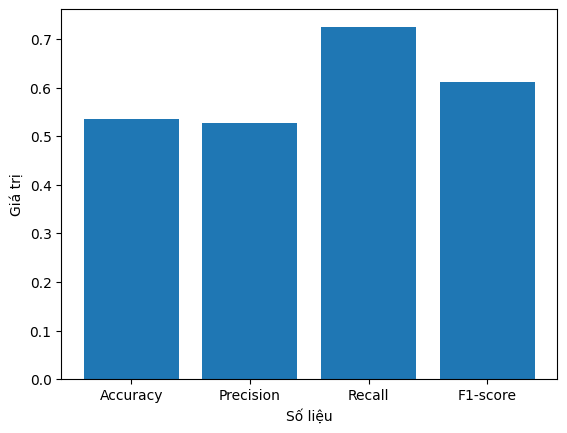

In [ ]:
X_train,X_test,Y_train,Y_test=preprocessing(df,task='Classification')
svm_model = SVC()
svm_model.fit(X_train,Y_train)
Y_pred = svm_model.predict(X_test)

print("SVM Accuracy:",accuracy_score(Y_test, Y_pred))
print("SVM Precision:",precision_score(Y_test, Y_pred))
print("SVM Recall:",recall_score(Y_test, Y_pred))
print("SVM F1 Score:",f1_score(Y_test, Y_pred))

accuracy = 0.5359116022099447
precision = 0.528
recall = 0.7252747252747253
f1 = 0.611111111111111 
 
# Tên các độ đo
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
 
# Giá trị của các độ đo
values = [accuracy, precision, recall, f1]
 
# Vẽ biểu đồ cột
plt.bar(metrics, values)
 
# Đặt tên cho trục x và y
plt.xlabel('Số liệu')
plt.ylabel('Giá trị')
 
# Hiển thị biểu đồ
plt.show()

# **Naïve Bayes:**

NB Accuracy: 0.4972375690607735
NB Precision: 0.5
NB Recall: 0.9560439560439561
NB F1 Score: 0.6566037735849056


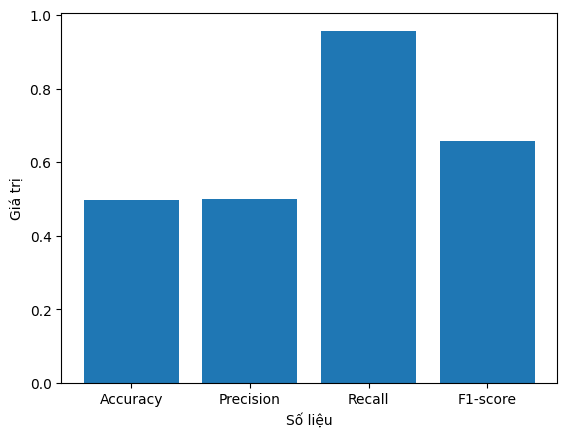

In [172]:
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)
Y_pred = nb_model.predict(X_test)

print("NB Accuracy:",accuracy_score(Y_test, Y_pred))
print("NB Precision:",precision_score(Y_test, Y_pred))
print("NB Recall:",recall_score(Y_test, Y_pred))
print("NB F1 Score:",f1_score(Y_test, Y_pred))

accuracy = 0.4972375690607735
precision = 0.5
recall = 0.9560439560439561
f1 = 0.6566037735849056 
 
# Tên các độ đo
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
 
# Giá trị của các độ đo
values = [accuracy, precision, recall, f1]
 
# Vẽ biểu đồ cột
plt.bar(metrics, values)
 
# Đặt tên cho trục x và y
plt.xlabel('Số liệu')
plt.ylabel('Giá trị')
 
# Hiển thị biểu đồ
plt.show()

# **K-NN:**

KNN Accuracy: 0.5303867403314917
KNN Precision: 0.5283018867924528
KNN Recall: 0.6153846153846154
KNN F1 Score: 0.5685279187817259


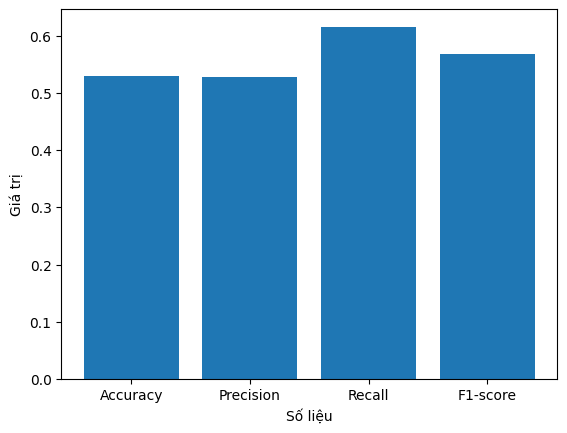

In [173]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,Y_train) 
Y_pred = knn_model.predict(X_test)

print("KNN Accuracy:",accuracy_score(Y_test, Y_pred))
print("KNN Precision:",precision_score(Y_test, Y_pred))
print("KNN Recall:",recall_score(Y_test, Y_pred))
print("KNN F1 Score:",f1_score(Y_test, Y_pred))

accuracy = 0.5303867403314917
precision = 0.5283018867924528
recall = 0.6153846153846154
f1 = 0.5685279187817259
 
# Tên các độ đo
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
 
# Giá trị của các độ đo
values = [accuracy, precision, recall, f1]
 
# Vẽ biểu đồ cột
plt.bar(metrics, values)
 
# Đặt tên cho trục x và y
plt.xlabel('Số liệu')
plt.ylabel('Giá trị')
 
# Hiển thị biểu đồ
plt.show()

# **Hồi quy logistic:**

Accuracy: 0.5359116022099447
Precision: 0.528
Recall: 0.7252747252747253
F1 Score: 0.611111111111111


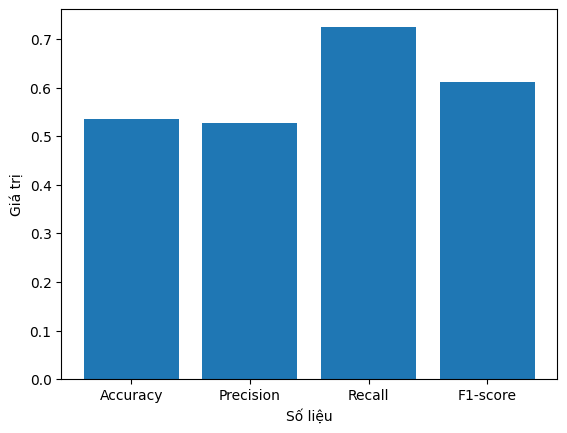

In [165]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train,Y_train)
Y_pred = log_reg_model.predict(X_test)

print("Accuracy:",accuracy_score(Y_test, Y_pred))
print("Precision:",precision_score(Y_test, Y_pred))
print("Recall:",recall_score(Y_test, Y_pred))
print("F1 Score:",f1_score(Y_test, Y_pred))

accuracy = 0.5359116022099447
precision = 0.528
recall = 0.7252747252747253
f1 = 0.611111111111111 
 
# Tên các độ đo
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
 
# Giá trị của các độ đo
values = [accuracy, precision, recall, f1]
 
# Vẽ biểu đồ cột
plt.bar(metrics, values)
 
# Đặt tên cho trục x và y
plt.xlabel('Số liệu')
plt.ylabel('Giá trị')
 
# Hiển thị biểu đồ
plt.show()

# **Decision Tree Regressor:**

In [170]:
# Điểm R2 âm không phù hợp, R2 càng gần 1 thì mô hình càng chính xác!
reg = dtr(random_state = 42)
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print("MSE =", mse(Y_pred, Y_test)) # giá trị trung bình của các sai số tuyệt đối
print("MAE =", mae(Y_pred, Y_test)) # giá trị trung bình của các sai số bình phương
print("R2 Score =", r2_score(Y_pred, Y_test)) 

MSE = 0.48066298342541436
MAE = 0.48066298342541436
R2 Score = -0.9359478731251545


# **Random Forest Regressor:**

In [169]:
# Điều này thậm chí còn tệ hơn Decision Tree Regressor
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)
print("MSE =", mse(Y_pred, Y_test))
print("MAE =", mae(Y_pred, Y_test))
print("R2 Score =", r2_score(Y_pred, Y_test))

MSE = 0.25565684358873275
MAE = 0.4978913875023289
R2 Score = -37.05437410474742


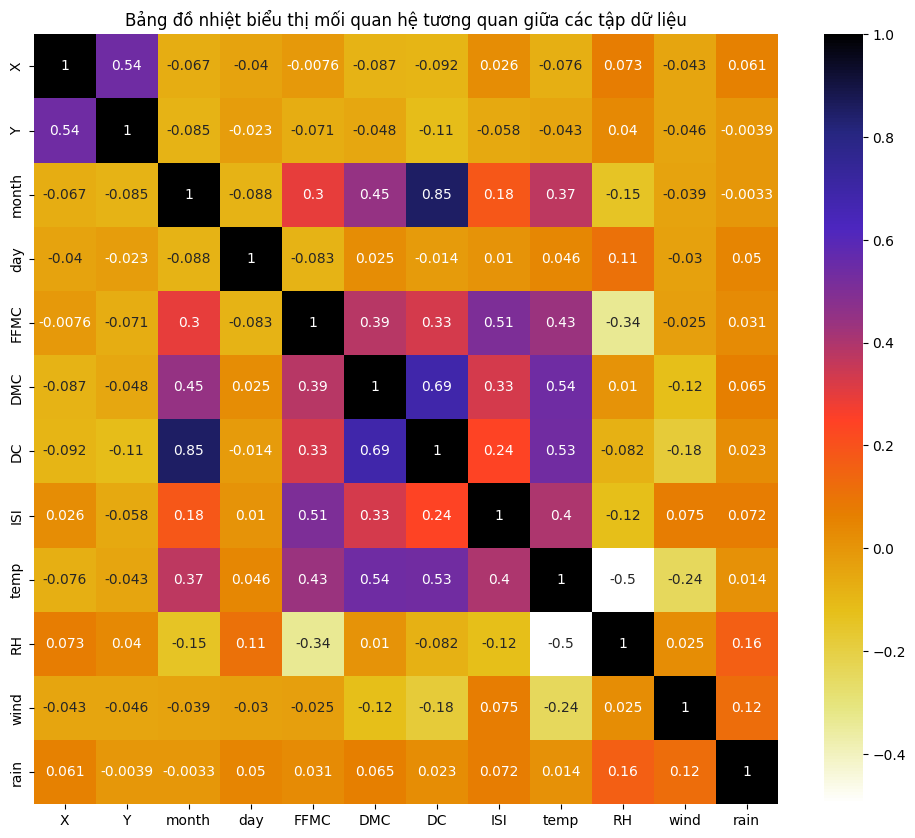

In [166]:
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r )
plt.title("Bảng đồ nhiệt biểu thị mối quan hệ tương quan giữa các tập dữ liệu")
plt.show()

array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'FFMC'}>],
       [<Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>],
       [<Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'wind'}>],
       [<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>, <Axes: >]], dtype=object)

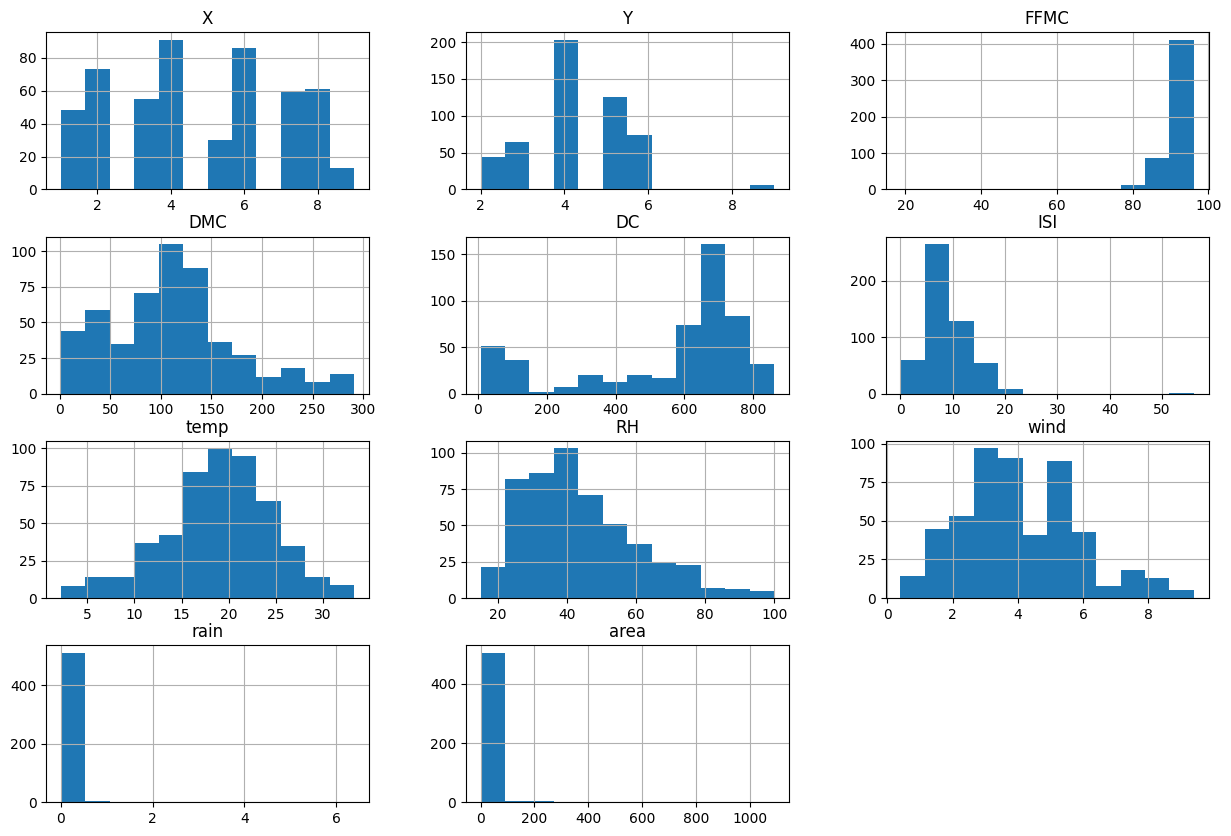

In [167]:
# Biểu đồ Histogram sẽ giúp chúng ta hiểu thêm về tập tin
plt.figure(figsize=(15,10))
a1 = plt.gca()
df.hist(ax=a1, bins=12)